# D213 - Advanced Data Analytics
## NLM3 TASK 2 - SENTIMENT ANALYSIS USING NEURAL NETWORKS
### Western Governor's University - November 14, 2024
*Performed by Kevin Rupe, 011165981, krupe6@wgu.edu, (864) 704-2340*

# Table of Contents
* [Part I: Research Question](#part1)
    * [A1: Research Question](#a1)
    * [A2: Objective or Goals](#a2)
    * [A3: Prescribed Network](#a3)

* [Part II: Data Preparation](#part2)
    * [B1: Data Exploration](#b1)
    * [B2: Tokenization](#b2)
    * [B3: Padding Process](#b3)
    * [B4: Categories of Sentiment](#b4)
    * [B5: Steps to Prepare the Data](#b5)
    * [B6: Prepared Data Set](#b6)

* [Part III: Network Architecture](#part3)
    * [C1: Model Summary](#c1)
    * [C2: Network Architecture](#c2)
    * [C3: Hyperparameters](#c3)

* [Part IV: Model Evaluation](#part4)
    * [D1: Stopping Criteria](#d1)
    * [D2: Fitness](#d2)
    * [D3: Training Process](#d3)
    * [D4: Predictive Accuracy](#d4)

* [Part V: Summary and Recommendations](#part5)
    * [E: Code](#e)
    * [F: Functionality](#f)
    * [G: Recommendations](#g)

* [Part VI: Reporting](#part6)
    * [H: Reporting](#h)
    * [I: Sources for Third-Party Code](#i)
    * [J: Sources](#j)

## Part I: Research Question <a class="anchor" id="part1"></a>

### A1: Research Question <a class="anchor" id="a1"></a>

Are we able to analyze customers' sentiment in the dataset using NN (Neural Networks) and NLP (Natural Language Processing) with a high level of accuracy? 

### A2: Objective or Goals <a class="anchor" id="a2"></a>

The primary goal of this analysis is to accurately identify positive and negative comments from customer reviews from three different datasets: 
 - 1) IMDb: A dataset containing 1,000 reviews of movies, films, or tv shows.
 - 2) Amazon: A dataset containing 1,000 reviews of Amazon products, most likely related to cell phones and accessories.
 - 3) Yelp!: A dataset containing 1,000 reviews of restaurants from local patrons.
 
 I also will summarize the results of this analysis and provide a recommended course of action. 

### A3: Prescribed Network <a class="anchor" id="a3"></a>

A Neural Network (NN) is a machine learning program that is modeled after the human brain. It uses processes much the same way as a human brain does with how interconnected our brains are. This creates many connections between the layers setup in the model. The NN learns from the patterns it sees. There are several different types of Neural Networks such as *Deep Neural Networks (DNN), Convolutional Neural Networks (CNN), Artificial Neural Networks (ANN), and Recurrent Neural Networks (RNN)* (IBM, n.d.).

Some of these Neural Networks are more suited with imagery data, but in our dataset, we are concerned with text classification. Specifically, we are hoping to achieve a model that can predict a customer's sentiment; whether their review (i.e., text) has a positive sentiment or a negative one. 

For this project, I will be using a type of RNN called *Long Short-Term Memory (LSTM)* which is designed to handle sequential data. LSTM Neural Networks are able to capture temporal dependencies and long-term patterns due to being able to maintain memory over time. I believe this model will be able to accurately analyze the textual datasets (aakarshachug, 2024). 

## Part II: Data Preparation <a class="anchor" id="part2"></a>

In [2]:
import pandas as pd
import numpy as np
import gzip #unzipping the input file
import re #regex
import sys #system
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings #to ignore warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings('ignore')

In [3]:
# Install Natural Language Libraries
import nltk  # natural language toolkit
from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\e0145653\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\e0145653\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\e0145653\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\e0145653\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\e0145653\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [42]:
#Import TensorFlow & Scikit-Learn libraries
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split

import tensorflow as tf  # tensorflow package
from tensorflow import keras # neural networks API
from tensorflow.keras.preprocessing.text import Tokenizer  # convert input text to tokens
from tensorflow.keras.preprocessing.sequence import pad_sequences  # pads texts
from tensorflow.keras.callbacks import EarlyStopping  # stop training at threshold
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau # reduces learning rate on plateau
from tensorflow.keras.models import load_model, Sequential #load a saved model
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Dropout, LSTM, SpatialDropout1D

In [43]:
print("The TensorFlow version in my environment is:",tf.__version__)

The TensorFlow version in my environment is: 2.18.0


### B1: Data Exploration <a class="anchor" id="b1"></a>

In [6]:
#import csv files
column_headers = ['Review', 'Score']
imdb = pd.read_csv('C:/Users/e0145653/Documents/WGU/D213 - Advanced Data Analytics/PRFA - NLM3/imdb_labelled.txt', 
                 sep=r'\s*\t\s', header=None, names=column_headers, engine='python')
amazon = pd.read_csv('C:/Users/e0145653/Documents/WGU/D213 - Advanced Data Analytics/PRFA - NLM3/amazon_cells_labelled.txt', 
                 sep='\t', header=None, names=column_headers, engine='python')
yelp = pd.read_csv('C:/Users/e0145653/Documents/WGU/D213 - Advanced Data Analytics/PRFA - NLM3/yelp_labelled.txt', 
                 sep='\t', header=None, names=column_headers, engine='python')

df = pd.concat((yelp, amazon, imdb), ignore_index=True)

In [7]:
#what is the shape of the dataframe?
print(df.shape)

(3000, 2)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  3000 non-null   object 
 1   Score   2000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.0+ KB


In [9]:
df.head()

,Review,Score
0,Wow... Loved this place.,1.0
1,Crust is not good.,0.0
2,Not tasty and the texture was just nasty.,0.0
3,Stopped by during the late May bank holiday of...,1.0
4,The selection on the menu was great and so wer...,1.0


In [10]:
#How many null/NaN values are there in this dataset?
print(df.isna().sum())
print("")
print(df.isnull().sum())

Review       0
Score     1000
dtype: int64

Review       0
Score     1000
dtype: int64


In [11]:
nan_rows = df[df['Score'].isna()]
nan_rows

,Review,Score
2000,"A very, very, very slow-moving, aimless movie ...",NaN
2001,Not sure who was more lost - the flat characte...,NaN
2002,Attempting artiness with black & white and cle...,NaN
2003,Very little music or anything to speak of. \t0,NaN
2004,The best scene in the movie was when Gerardo i...,NaN
...,...,...
2995,I just got bored watching Jessice Lange take h...,NaN
2996,"Unfortunately, any virtue in this film's produ...",NaN
2997,"In a word, it is embarrassing. \t0",NaN
2998,Exceptionally bad! \t0,NaN


I can see here in this dataset, that despite my best efforts at reading in the data with Pandas `read_csv()` function I still have a few rows which did not properly pull the score out of the text correctly. I originaly read in these texts looking for separation via tabbed delimination (Bruce, 2020). 

After realizing this did not work accurately, I used an approach to look for extra spaces using a `re` (Regex, i.e., Regular Expression) format. This worked much better at splitting the data into rows, but for 1,000 of these reviews the score did not convert properly. 

Looking at the dataset, I can see that the last character in the Review column is actually the Score that didn't read in correctly. I address this below by writing a function to fix these scores. First, defining a variable where the scores are NaN. Then, for each row with a NaN score, we check that the Review > 0 and that the last character in the row is a digit. If so, we store that digit in the Score column instead, and then remove that character from the Review column. 

In [12]:
# Function to process the DataFrame
def fix_scores(df):
    # Find NaN scores
    nan_score_rows = df['Score'].isna()
    
    # Process each row with NaN score
    for index in df[nan_score_rows].index:
        review = df.at[index, 'Review']

        # Ensure the Review is not None and has at least one character
        if review and len(review) > 0:
            # Extract the last character if it's a digit
            last_char = review[-1]
            if last_char.isdigit():
                # Update the Score with the last character
                df.at[index, 'Score'] = int(last_char)
                # Remove the last character from the Review
                df.at[index, 'Review'] = review[:-1]

# Fix the DataFrame
fix_scores(df)

In [13]:
#How many null/NaN values are there in this dataset?
print(df.isna().sum())
print("")
print(df.isnull().sum())

Review    0
Score     0
dtype: int64

Review    0
Score     0
dtype: int64


We can now see that we have no more NaN values in either column. 

In [14]:
df['total_words'] = [len(x.split()) for x in df['Review'].tolist()]
df['total_chars'] = df['Review'].apply(len)
df_sorted = df.sort_values(by='total_words', ascending=False)
df_sorted

,Review,Score,total_words,total_chars
2620,"This is a masterful piece of film-making, with...",1.0,71,480
2421,This movie is excellent!Angel is beautiful and...,1.0,62,382
2298,I have to mention this and it is a huge SPOILE...,1.0,61,336
2428,The use of slow-motion needlessly repeats itse...,0.0,56,322
2390,Though The Wind and the Lion is told largely t...,1.0,54,337
...,...,...,...,...
2125,10/10 \t,1.0,1,8
1463,Disappointed!.,0.0,1,14
2155,Horrible! \t,0.0,1,12
2162,Awful. \t,0.0,1,9


It's important to know how many words and characters are in each row. This will be used later on when we add in hyperparameter tuning in our model. A good rule is that the input length on the `Embedding` layer in TensorFlow should be set to the maximum length of total words in any row. We can see that so far in this dataset, our maximum embedding length would be 71. But there are more steps to take to prepare our text before we can run our LSTM model, so for now this value is a good proposal for our embedding length for our LSTM model. 

In [15]:
#initial list of words/characters in reviews
reviews = df['Review']

list_of_chars = []

for comments in reviews:
    for character in comments:
        if character not in list_of_chars:
            list_of_chars.append(character)

print(list_of_chars)

['W', 'o', 'w', '.', ' ', 'L', 'v', 'e', 'd', 't', 'h', 'i', 's', 'p', 'l', 'a', 'c', 'C', 'r', 'u', 'n', 'g', 'N', 'y', 'x', 'j', 'S', 'b', 'M', 'k', 'f', 'R', 'm', 'T', 'I', 'H', "'", 'A', ')', ',', '!', 'V', 'B', 'z', '-', '4', 'O', '2', '3', 'q', 'P', 'F', 'G', '5', '1', '0', 'E', 'Z', 'D', 'U', 'J', 'Y', 'K', '&', 'é', ':', ';', '9', '7', '(', 'X', '"', '/', '8', 'Q', '$', '%', '+', '*', '?', '6', 'ê', '#', '[', ']', '\t', '\x96', '\x85', 'å', '\x97']


In [16]:
# Define a regex pattern for emojis
emoji_pattern = re.compile(
    "["
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE
)

# Function to find emojis in a text
def find_emojis(text):
    return emoji_pattern.findall(text)

# Apply the function to the 'Review' column
df['Emojis'] = df['Review'].apply(find_emojis)

# Filter the DataFrame to show only rows with non-empty 'Emojis'
df_with_emojis = df[df['Emojis'].apply(lambda x: len(x) > 0)]

# Display the filtered DataFrame
print(df_with_emojis)

Empty DataFrame
Columns: [Review, Score, total_words, total_chars, Emojis]
Index: []


I did not find unicoded emoji's in these reviews. However, as you can see below, when checking for non-English characters, I ran into an odd question-mark box. Is this Super Mario Bros I thought? No, I believe this was badly converted emojis or special characters. Therefore, we need to deal with these. I therefore, created a function to find these characters and replace them with an empty space.

In [17]:
# Define a regex pattern for non-English characters
non_english_pattern = re.compile(r'[^\x00-\x7F\u00E9\u00EA\u00E5]+')

# Function to find non-English characters in a text
def find_non_english(text):
    return non_english_pattern.findall(text)

# Apply the function to the 'Review' column
df['NonEnglish'] = df['Review'].apply(find_non_english)

# Filter the DataFrame to show only rows with non-empty 'Emojis'
df_with_non_english = df[df['NonEnglish'].apply(lambda x: len(x) > 0)]

# Display the filtered DataFrame
print(df_with_non_english)

                                                 Review  Score  total_words  \
2018  It's practically perfect in all of them  a tr...    1.0           17   
2178              The script iswas there a script?  \t    0.0            7   
2182      I'll even say it again  this is torture.  \t    0.0            9   
2517  The script is bad, very bad  it contains both...    0.0           24   
2557  Let's start with all the problemsthe acting, ...    0.0           16   
2760  Technically, the film is well made with impres...    1.0           35   
2863  But, Kevin Spacey is an excellent, verbal tsun...    1.0           21   
2967  Definitely worth seeing it's the sort of thou...    1.0           20   

      total_chars Emojis NonEnglish  
2018           95     []        []  
2178           36     []        []  
2182           44     []        []  
2517          128     []        []  
2557          104     []        []  
2760          229     []        []  
2863          124     

In [18]:
# Function to replace non-English characters with a space
def replace_non_english(text):
    return non_english_pattern.sub(' ', text)

# Apply the function to the 'Review' column
df['Review'] = df['Review'].apply(replace_non_english)

In [19]:
# Apply the function to the 'Review' column
df['NonEnglish'] = df['Review'].apply(find_non_english)

# Filter the DataFrame to show only rows with non-empty 'Emojis'
df_with_non_english = df[df['NonEnglish'].apply(lambda x: len(x) > 0)]

# Display the filtered DataFrame
print(df_with_non_english)

Empty DataFrame
Columns: [Review, Score, total_words, total_chars, Emojis, NonEnglish]
Index: []


We can now see that there are no more non-English characters needing to be cleaned, or emojis. Therefore, since these columns are blank, I am going to drop them from our dataset now as they are no longer necessary for this assignment.

In [20]:
# Drop Emojis and NonEnglish columns from Dataframe
df = df.drop(columns=['Emojis', 'NonEnglish'])

In [21]:
df

,Review,Score,total_words,total_chars
0,Wow... Loved this place.,1.0,4,24
1,Crust is not good.,0.0,4,18
2,Not tasty and the texture was just nasty.,0.0,8,41
3,Stopped by during the late May bank holiday of...,1.0,15,87
4,The selection on the menu was great and so wer...,1.0,12,59
...,...,...,...,...
2995,I just got bored watching Jessice Lange take h...,0.0,11,64
2996,"Unfortunately, any virtue in this film's produ...",0.0,14,93
2997,"In a word, it is embarrassing. \t",0.0,6,33
2998,Exceptionally bad! \t,0.0,2,21


In [22]:
#identify vocabulary size
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(df['Review'])
vocab_size = len(tokenizer.word_index) +1
print("Vocabulary Size:", vocab_size)

Vocabulary Size: 5269


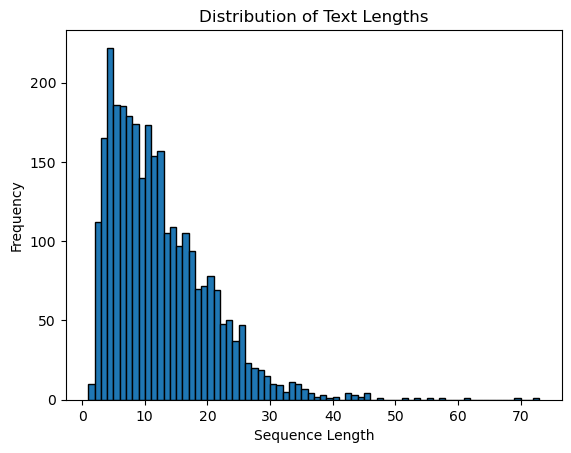

Optimal max_length covering 95% of sequences: 26


In [23]:
# tokenization
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['Review'])

# convert texts to sequences
sequences = tokenizer.texts_to_sequences(df['Review'])

# calculate the length of sequences
sequence_lengths = [len(seq) for seq in sequences]

# Plot histogram of sequence lengths
plt.hist(sequence_lengths, bins=range(1, max(sequence_lengths) + 1), edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

# Determine max_length based on coverage
def find_optimal_max_length(lengths, coverage=0.95):
    sorted_lengths = sorted(lengths)
    cutoff_index = int(len(sorted_lengths) * coverage)
    return sorted_lengths[cutoff_index]

optimal_max_length = find_optimal_max_length(sequence_lengths)
print(f'Optimal max_length covering 95% of sequences: {optimal_max_length}')

To get 95% coverage in our dataset, we should go with a maximum sequence length of 26. 

### B2: Tokenization <a class="anchor" id="b2"></a>

Tokenization is a crucial preprocessing step in *Natural Language Processing (NLP)* and text analysis. The process takes the data, in this example, text and attempts to break this down into smaller chunks, words. These are then called tokens (Lutkevich, 2023). 

The goal of tokenization is to minimize the amount of data we use in our model. By sending in too much data, this can cause our model to perform poorly, so we need to normalize our text during the tokenization process. 

Below, you will see the code which takes our review text data and removes punctuation. Afterall, these computational models do not care about whether a word has a period, exclamation point, or question mark. It can find the sentiment without these things, so we will remove punctuation. Also, to further reduce the words, it's not important to have 2 identical words where one is capitalized and the other is not. So we can reduce this in our tokenization process by just taking the lowercase of each word in our dataset. Continuing on, we will also remove any digit, additional whitespace, and *stop words*, which are words that do not carry significant meaning (such as "a", "the", or "you").

Lastly, we will lemmatize the tokens which finds the root of words and changes the word to it's root form. For example, the following words all have the same root word "change":
   * change
   * changing
   * changed
   * changes
   * changer

So, lemmatization will find any of these related words and just update them all to *change*. Therefore, less words, and better streamlined text. It may not be as readible to humans, but the NN model works much better after lemmatization.

In [24]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to convert NLTK POS tags to WordNet POS tags
def get_wordnet_pos(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

#create blank list
description_list = []

for description in df['Review']:
    # remove punctuations
    import string
    description = description.translate(str.maketrans(' ', ' ', string.punctuation))
    # convert to lower case
    description = description.lower()
    # remove numbers
    import re
    description = re.sub(r'\d+', ' ', description)
    # remove whitespace
    description = description.strip()
    description = re.sub(r'\s+', ' ', description)
    # perform tokenization
    description = nltk.word_tokenize(description)
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in description if word not in stop_words]
    # POS tagging
    pos_tags = nltk.pos_tag(tokens)
    # Perform lemmatization with POS tagging
    lemmed_tokens = [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos) or wordnet.NOUN)
        for word, pos in pos_tags
    ]
    # Append the processed description to the list
    description_list.append(' '.join(lemmed_tokens))

In [25]:
assert len(description_list) == len(df)

df['Cleaned_Review'] = description_list
df

,Review,Score,total_words,total_chars,Cleaned_Review
0,Wow... Loved this place.,1.0,4,24,wow love place
1,Crust is not good.,0.0,4,18,crust good
2,Not tasty and the texture was just nasty.,0.0,8,41,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1.0,15,87,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1.0,12,59,selection menu great price
...,...,...,...,...,...
2995,I just got bored watching Jessice Lange take h...,0.0,11,64,get bored watching jessice lange take clothes
2996,"Unfortunately, any virtue in this film's produ...",0.0,14,93,unfortunately virtue film production work lose...
2997,"In a word, it is embarrassing. \t",0.0,6,33,word embarrassing
2998,Exceptionally bad! \t,0.0,2,21,exceptionally bad


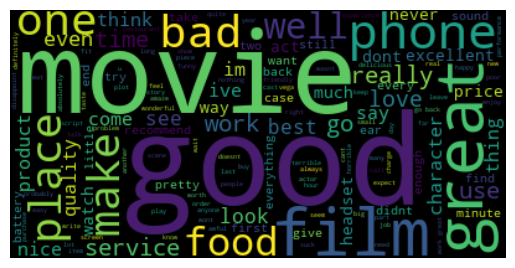

In [26]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# Add additional stopwords
stop_words = set(STOPWORDS)
stop_words.update(['br', 'href'])

# Combine all text from the dataframe into a single string
textt = " ".join(review for review in df.Cleaned_Review)

# Generate the word cloud
wordcloud = WordCloud(stopwords=stop_words, background_color='black').generate(textt)

# Display the generated word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.savefig('wordcloud.png')
plt.show()  # Display the plot

### B3: Padding Process <a class="anchor" id="b3"></a>

"Padding" is a process by which extra tokens (typically zeros) are added to either the end or the beginning of the tokenized vector. This is used to ensure that all input sequences have the same length which is necessary for batch processing in neural networks. 

In my code below, I chose to append these *pads* to the end of the sequences. I am using a sequence length of 26 as per the analysis performed in step B1. 

In [27]:
# Convert text data to features
X = np.array(description_list)

# Get target values
y = df['Score'].values

# Split dataframe into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1214, stratify = y)

# Convert y_train and y_test to Pandas Series
y_train = pd.Series(y_train)
y_test  = pd.Series(y_test)

#view training/testing sets
print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)

Training Set Size: (2400,)
Testing Set Size: (600,)


In [35]:
# Fit tokenizer on X_train
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

# apply padding to training data
sequences_train = tokenizer.texts_to_sequences(X_train)
padded_train = pad_sequences(sequences_train, 
                             padding='post',
                             maxlen=26)

# calculate vocab size
train_vocab_size = len(tokenizer.word_index) + 1
print("Train vocab size: ", train_vocab_size)

# Fit tokenizer on X_train
tokenizer.fit_on_texts(X_test)
# apply padding to testing data
sequences_test = tokenizer.texts_to_sequences(X_test)
padded_test = pad_sequences(sequences_test, 
                            padding='post',
                            maxlen=26)

# calculate vocab size
test_vocab_size = len(tokenizer.word_index) + 1
print("Test vocab size: ", test_vocab_size)

Train vocab size:  3866
Test vocab size:  4438


In [29]:
# set print options to display entire array if desired
np.set_printoptions(threshold=sys.maxsize)

# display the padded train & padded test
print(sequences_train[1])
print("")
print(padded_train[1])

[19, 5, 1026, 93, 234]

[  19    5 1026   93  234    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


### B4: Categories of Sentiment <a class="anchor" id="b4"></a>

In the three datasets, which have been concatenated into one cohesive set, there are only 2 categories of sentiment: positive and negative. We were given just 0's and 1's, so there are no other choices. 

The plot below shows the breakdown between both sentiments which is nearly a dead even split 50-50. 

<Axes: title={'center': 'Sentiment of Dataset'}, xlabel='Sentiment', ylabel='count'>

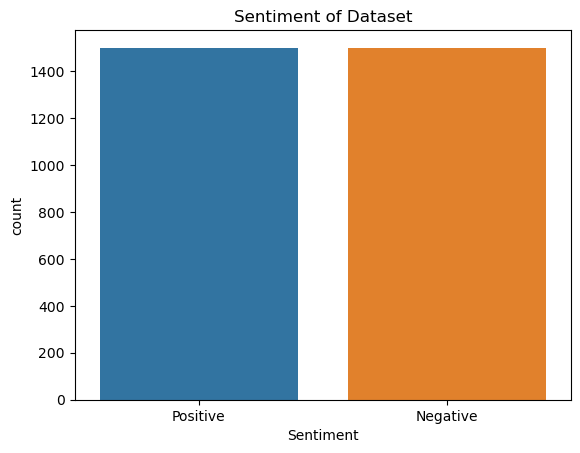

In [30]:
#defining positive/negative sentiment
df['Sentiment'] = df.Score.apply(lambda x: "Negative" if x == 0 else "Positive")
#plot the distribution
plt.title("Sentiment of Dataset")
sns.countplot(x='Sentiment', data=df)

### B5: Steps to Prepare the Data <a class="anchor" id="b5"></a>

Throughout all of the above, I have explained the various steps that I have used to prepare the data for analysis. Cleaning the data is a fundamental step in any data analysis, but especially in machine learning (Larose, 2019). After the data had been cleaned, I split the data using Scikit-learn's `train_test_split()` function with an 80% training set size, which is 2,400 rows, and a 20% testing set size, which is 600 rows. Given that this is a relatively small dataset at just 3,000 rows, I am choosing a larger training size to allow the model to train effectively. 

In the `train_test_split()` function, there is also an option to set a validation set as well. However, I chose to not create a validation set. The `Sequential` model from TensorFlow already provides validation accuracy and validation loss, so given that, I didn't see a need to split the data into training, testing, *and validation* sets. 

### B6: Prepared Data Set <a class="anchor" id="b6"></a>

The prepared dataset has been provided in this assignment. 

In [32]:
df.to_csv('cleaned_data.csv')

In [33]:
#convert padded data to numpy array to be used in model
training_padded = np.array(padded_train)
training_label = np.array(y_train)
test_padded = np.array(padded_test)
test_label = np.array(y_test)

## Part III: Network Architecture <a class="anchor" id="part3"></a>

### C1: Model Summary <a class="anchor" id="c1"></a>

In [54]:
# show the model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (32, 100, 75)          │       412,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (32, 100, 64)          │        35,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (32, 100, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (32, 32)               │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (32, 32)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (32, 1)                │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,382,369 (5.27 MB)

 Trainable params: 460,789 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 921,580 (3.52 MB)

In [48]:
# model parameters
early_stopping_monitor = EarlyStopping(monitor='val_loss',
                                      patience=3,
                                      restore_best_weights=True)

# definition of the model and layers
model = Sequential([
    Embedding(input_dim=5500, output_dim=75, input_length=26),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    LSTM(32),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
# compile the model parameters
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### C2: Network Architecture <a class="anchor" id="c2"></a>

In my model's architecture, I used 6 layers total. I will breakdown each layer by explaining the purpose of each layer, the total number of parameters, with an explanation of the parameters as well. 

**Embedding Layer**
* **Definition:** Fundamental in neural networks that use NLP. This layer transforms input text into continuous vectors.
* **Configuration:** 
    * *input_dim = 5500*
        * Refers to the vocab size, which indicates the number of tokens.
            * Full dataset vocab size = 5269
            * Training vocab size = 3866
            * Testing vocab size = 4438
        * Therefore, a size of 5500 provides ample room for training this model.
    * *output_dim = 75*
        * Refers to the dense embedding for each token.
        * I found that our max length words in each token is 72.
        * Therefore, 75 is a good value to use for this model.
    * *input_length = 26*
        * Refers to the length of input sequences.
        * I found that the best sequence length is 26, which covers 95% of the tokens.
* **Parameters:** 
    * Represent the weights that map each word to its corresponding embedding vector.
    * input_dim * output_dim = 5500 * 75 = 412,500  
          
  

**First LSTM Layer**
* **Definition:** Has a memory cell that maintains certain information over time. This helps capture long-term dependencies in NLP.
* **Configuration:** 
    * *units = 64*
        * Refers to the number of memory cells in the layer.
        * These memory cells are referred to as Long Short Term Memory units, hence the name.
    * *return_sequences = True*
        * Specifies that the layer should return full sequences of outputs.
        * This is necessary when using multiple LSTM layers.
* **Parameters:**
    * The formula for the number of parameters in LSTM is as follows: 
        * 4 * (LSTM units * (input_dim (from previous layer) + LSTM units + 1))
        * 4 * (64 * (64 + 75 + 1)) = 35,840 


**First Dropout Layer**
* **Definition:** This is referred to as a regularization layer which prevents overfitting. 
* **Configuration:** 
    * *rate = 0.5*
        * Indicates the percentage of input units that are randomly set to zero before the next layer.
        * This helps limit overfitting. 
* **Parameters:**
    * Dropout layers do not have training parameters.

**Second LSTM Layer**
* **Configuration:** 
    * *units = 32*
* **Parameters:**
    * 4 * (32 * (32 + 64 + 1)) = 12,416
    
**Second Dropout Layer**
* **Configuration:** 
    * *rate = 0.5*
 
    
**Dense Layer**
* **Definition:** Applies a linear transformation to the input data by adjusting weights and biases during training.
* **Configuration:** 
    * *units = 1*
        * Indicates a single neuron for binary classification.
    * *activation = 'sigmoid'*
        * This activation function is used for binary output. 
        * It provides a probability score between 0 and 1.
* **Parameters:**
    * The formula for the number of parameters in the Dense layer is as follows:
        * Dense unit * (input_dim (from previous layer) + Dense unit)
        * 1 * (32 + 1) = 33

The total number of parameters in this case are the amount of trainable parameters + the number of optimizer parameters. The Adam optimizer uses 921,580 parameters. We can then add up the number of parameters in each of the 6 layers to equal 460,789. These two added together provide us with the total number of parameters, which is 1,382,369. 

### C3: Hyperparameters <a class="anchor" id="c3"></a>

Choosing the right hyperparameters will determine whether the model performs well or not. I will provide justifications for each hyperparameter below. 

**Activation Function: sigmoid**

Since our dataset provides binary sentiment scores, this is the correct choice for an activation function. Sigmoid is specifically used in binary classification tasks (Brownlee, 2021). 

**Number of nodes per layer**

The input layer (Embedding) should match the number of features in the dataset. As previously explained in C2, I chose appropriate values that align with this dataset. The hidden layers (LSTM) were chosen at 64 and 32 to provide balance and computational efficiency. Best practice is to use a exponential factor of 2, which I did by using 2^6 (64), and 2^5 (32). 64 is slightly smaller than the embedding length of 75 in the 1st layer, so this was in my opinion the best choice. The final output layer (Dense) we are looking for the output, which in this case is going to be a single digit: 0 or 1. Therefore, 1 is the only option for the nodes in this layer. 

**Loss Function: binary_crossentropy**

Since we are looking for only binary output, this was the only suitable choice. This loss function measures the difference between the true binary labels and the predited probabilities. This loss function aligns perfectly with the sigmoid activation function.

**Optimizer: Adam**

Adaptive Moment Estimation (Adam) is a good choice for optimizing the model efficiency. Adam is a quick and efficient algorithm that adapts the learning rate during training. This leads to faster convergence over each epoch (prakharr0y, 2024). 

**Early Stopping: monitor = 'val_loss', patience = 3**

Early stopping prevents overfitting in the training process by halting the process when certain measurements fall outside the acceptable range. The *patience* refers to the number of epochs (3) the training process can go with increases in the monitored metric (val_loss) before the halting begins. If the validation loss worsens inititaly, but then improves within the patience window, then the training process will continue. During testing of these model parameters, I found that validtaion loss would consistently worsen over each epoch. This showed that the model was overfitting, so I found the best setting here for early stopping was to have a patience of 3. Any less and the model doesn't train well, providing a low accuracy, but any higher and overfitting occurs. A patience of 3 in this model provides a reasonable middle ground on training accuracy and not overfitting. 

**Evaluation Metric: accuracy**

By adding this metric during model compilation, we can visibly see how accurate each epoch is at correctly predicting the sentiment overall. Accuracy is a good metric in this dataset as it is very balanced between positive and negative responses. This would not be the case in an imbalanced dataset. 

## Part IV: Model Evaluation <a class="anchor" id="part4"></a>

### D1: Stopping Criteria <a class="anchor" id="d1"></a>

Early stopping monitors the model's performance at each epoch and halts the training process if the statistical data falls outside the threshold set. I set the number of epochs for the model to train on at 20, but in all of the models I tested with the early stopping setup like I have, it never made it past epoch 10, so I changed it to 10. 

The below screenshot shows the final epoch trained in my model. 

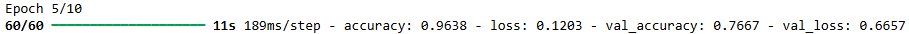

### D2: Fitness <a class="anchor" id="d2"></a>

We can assess the fitness of the model by using the `model.evaluate()` command, which will provide the accuracy and loss of the model. As you can see below, the training model has over 85% accuracy with 37.58% loss. Evaluating the model's accuracy and loss on the padded test set shows a dip to 74% accuracy with 57% loss. Having less than 15% difference in training and testing accuracy shows that this model is not overfitted.

In [51]:
# evaluate the model on training data
score = model.evaluate(training_padded, training_label, verbose=0)

# convert loss and accuracy to percentage, formatted to 3 decimal points
training_loss_pct = score[0] * 100
training_accuracy_pct = score[1] * 100

# print the results
print(f'Training Loss: {training_loss_pct:.3f}% / Training accuracy: {training_accuracy_pct:.3f}%')

Training Loss: 37.580% / Training accuracy: 85.708%


In [52]:
# evaluate the model on test data
score = model.evaluate(test_padded, test_label, verbose=0)

# convert loss and accuracy to percentage, formatted to 3 decimal points
test_loss_pct = score[0] * 100
test_accuracy_pct = score[1] * 100

# print the results
print(f'Test Loss: {test_loss_pct:.3f}% / Test accuracy: {test_accuracy_pct:.3f}%')

Test Loss: 56.668% / Test accuracy: 74.333%


In [53]:
# calculate the difference between the training and testing accuracies
diff = training_accuracy_pct - test_accuracy_pct

print(f'The difference between training and testing accuracy should be between 5-15%. This model is: {diff:.3f}%')

The difference between training and testing accuracy should be between 5-15%. This model is: 11.375%


### D3: Training Process <a class="anchor" id="d3"></a>

In [50]:
# Train the model
history = model.fit(training_padded, training_label, epochs=10, validation_split=0.2, batch_size=32, callbacks=[
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
])

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 26s 201ms/step - accuracy: 0.5102 - loss: 0.6930 - val_accuracy: 0.6771 - val_loss: 0.6824
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - accuracy: 0.7514 - loss: 0.6406 - val_accuracy: 0.7542 - val_loss: 0.5253
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.8923 - loss: 0.2914 - val_accuracy: 0.7771 - val_loss: 0.5517
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.9573 - loss: 0.1366 - val_accuracy: 0.7833 - val_loss: 0.5785
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - accuracy: 0.9638 - loss: 0.1203 - val_accuracy: 0.7667 - val_loss: 0.6657


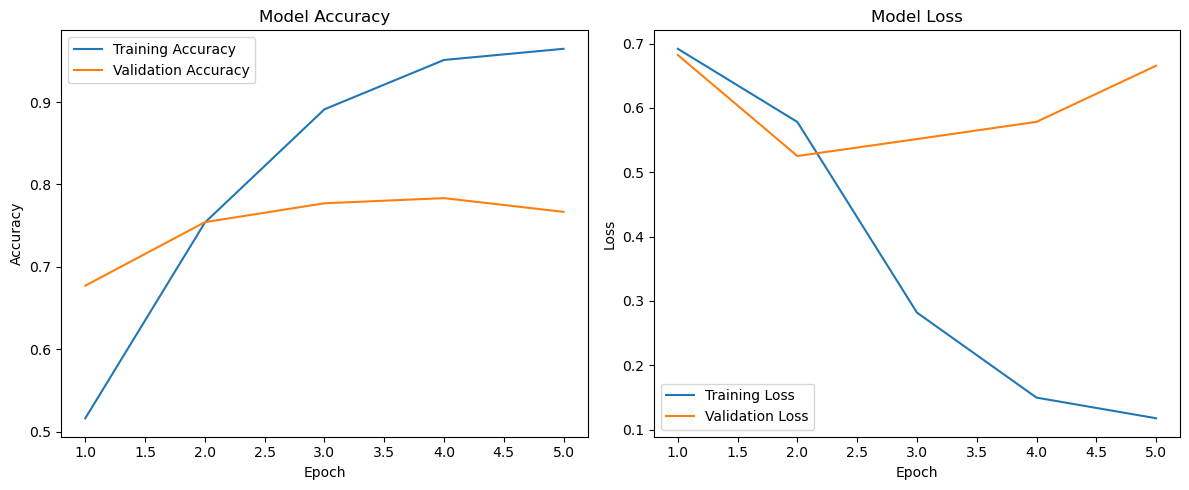

In [57]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

# Plot accuracy on the left
ax1.plot(range(1,6), history.history['accuracy'], label='Training Accuracy')
ax1.plot(range(1,6), history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='upper left')

# Plot loss on the right
ax2.plot(range(1,6), history.history['loss'], label='Training Loss')
ax2.plot(range(1,6), history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='lower left')

plt.tight_layout()
plt.show()

### D4: Predictive Accuracy <a class="anchor" id="d4"></a>

The predictive accuracy of the trained model is 85.708%. I run predictions below, and show examples of how this model predicts the sentiment compared to the actual sentiment. 

In [66]:
# perform predictions on training data
predictions = model.predict(training_padded)

75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step


In [71]:
# verify the predicted sentiment by comparing actual label from test data
i = 9

print("Predicted review from training set:", X_train[i], "\n")
print("Predicted: ", "Negative" if predictions[i][0] > 0.5 else "Positive", "review")
print("Actual: ", "Negative" if y_train[i] == 0 else "Positive", "review")

Predicted review from training set: one simply disappointment 

Predicted:  Negative review
Actual:  Negative review


In [68]:
# perform predictions on testing data
predictions = model.predict(test_padded)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


In [69]:
# verify the predicted sentiment by comparing actual label from test data
i = 100

print("Predicted review from test set:", X_test[i], "\n")
print("Predicted: ", "Negative" if predictions[i][0] > 0.5 else "Positive", "review")
print("Actual: ", "Negative" if y_test[i] == 0 else "Positive", "review")

Predicted review from test set: character interest want find longer movie go think people surprise doesnt make 

Predicted:  Positive review
Actual:  Positive review


## Part V: Summary and Recommendations <a class="anchor" id="part5"></a>

### E: Code <a class="anchor" id="e"></a>

I have provided the code used to save the trained network.

In [104]:
# save & load the model
model.save('my_model.keras')
my_model = load_model('my_model.keras')

### F: Functionality <a class="anchor" id="f"></a>

The functionality of my neural network is defined by it's 6 layers: Embedding, 2 LSTM, 2 Dropout, and Dense. The explanation of these layers and the purpose of them has been extensively explained in Step C2. The impacts of the network architecture are complex, and I found that setting the values of each hyperparameter can have widely varying results in the outcome. Early on in previous models I created, I noticed low levels of accuracy. And when I made adjustments to improve accuracy, then validation loss increased, which overfit my model. 

Embedding allows the network to generalize across similar words. This sets up the model nicely for the LSTM layers. Using LSTM has a good impact on this model's performance as LSTM is well-suited for handling sequential data. The Dropout layer provides regularization by not allowing the training process to overfit. Finally, the dense layer helps to classify our data in a binary output. This model leverages the strengths and weaknesses of each layer, setting up a successful model that trains and tests with a high level of accuracy. 

### G. Recommendations <a class="anchor" id="g"></a>

Given the high level of accuracy in this model, I would recommend to the business owners that they use this model to review their own customer's sentiments. In our dataset we were provided the actual sentiment, so this aided in our model build. However, often on social media, ratings aren't always provided. For example, what about comments on a recent social media post by the business? This is not in "review" format, so therefore you would not get a score. 

I would recommend that the company download all of the comments on a specific social media post into a dataset, and then run this model to predict the sentiment of the customers. This could prove useful in determining how well a new product or a new menu item is fairing in the public eye. This would be a good Marketing strategy for a company to do a slow rollout before ramping up production, which would be a very expensive mistake to make. If the company began mass producing their product before knowing if customers liked it, then this would be bad business. Instead, they could post about an upcoming product, and then garner customer interest through sentiment analysis prior to production. This is a wise strategy for any business. 

## Part VI: Reporting <a class="anchor" id="part6"></a>

### H: Reporting <a class="anchor" id="h"></a>

The Jupyter Notebook has been provided in Adobe PDF format for this presentation.

### I: Sources for Third-Party Code <a class="anchor" id="i"></a>

Pandas (2023, June 28). Retrieved September 27, 2023, from https://pandas.pydata.org/docs/reference/index.html.

Waskom, M. (2012-2022). Seaborn Statistical Data Visualization. Retrieved September 27, 2023, from https://seaborn.pydata.org/index.html.

Seabold, S., Perktold, J. (2010). statsmodels: Econometric and statistical modeling with python. Proceedings of the 9th Python in Science Conference. Retrieved November 1, 2024, from https://www.statsmodels.org/stable/index.html.

Pérez, F., Granger, B. IPython: A System for Interactive Scientific Computing, Computing in Science and Engineering, vol. 9, no. 3, pp. 21-29, May/June 2007, doi:10.1109/MCSE.2007.53. URL: https://ipython.org

hardikkushwaha. (2023, October 18). How to Add a Table of Contents in the Jupyter Notebook. Retrieved November 1, 2024, from https://www.geeksforgeeks.org/how-to-add-a-table-of-contents-in-the-jupyter-notebook/.

Abadi, M., Agarwal, A., Barham, P., et al. (2015). TensorFlow: Large-scale machine learning on heterogeneous systems. Retrieved November 15, 2024, from https://tensorflow.org/.

### J: Sources <a class="anchor" id="j"></a>

Bruce, P.A. (2020). Practical statistics for data scientists. 50+ essential concepts using r and python. O’Reilly Media, Incorporated. WGU Library.

Larose, C.D., Larose, D.T. (2019) Data science using Python and R. Chichester, NJ: Wiley Blackwell.

IBM (n.d.) What is a neural network? Retrieved on November 15, 2024, from https://www.ibm.com/topics/neural-networks.

aakarshachug. (2024, June 10). What is LSTM - Long Short Term Memory? Retrieved on November 15, 2024, from https://www.geeksforgeeks.org/deep-learning-introduction-to-long-short-term-memory/.

Lutkevich, B. (2023, February). tokenization. Retrieved on November 15, 2024, from https://www.techtarget.com/searchsecurity/definition/tokenization.

prakharr0y. (2024, March 20). What is Adam Optimizer? Retrieved on November 16, 2024, from https://www.geeksforgeeks.org/adam-optimizer/.

Brownlee, J. (2021, January 22). How to Choose an Activation Function for Deep Learning. Retrieved on November 16, 2024, from https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/.